In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:

def remove_gain(self_db, input_postfix, output_postfix, reclist): 
#---------------------------------------------------------------------------------------------------------------------------------------------
    xs=len(reclist)
    xc=0
   
    #print('fun')
    
        #print('loop')
    print('\nBEGIN TASK :: remove gain for ' + str(xs)+ ' records:' + input_postfix + ' --> ' + output_postfix)
    for rec in reclist:
        srec = self_db.get_record(rec)
        xc+=1
        print('Rec: '+rec+ ' ... '+ str(xc)+' of '+ str(xs))
        try:
            X = np.load(os.path.join( self_db.dir_npy , rec + '_'+input_postfix+'.npy')) #np.save(rec_fnpy + '_raw2.npy', mat_signal) 
            X = X/srec.lead_info[g_RAW_II_POSTFIX].gain
            np.save(os.path.join( self_db.dir_ds , rec + '_'+output_postfix+'.npy'),X) # save a copy of (median filtered ) signal = r,m  
        except:
            print('WARNING:: COUND NOT PROCESS SIGNAL FOR '+ srec.name)
        #----------------------------------------------------------------------         
    print('END TASK :: remove gain for ' + str(xs)+ ' records')
    return 0
#---------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
timestamp_start = datetime.datetime.now()
print(timestamp_start)
print('S T A R T \n')

#_____________________________________________


db_data = all_db.values()
for db in db_data:
    all_rec = db.recs_all
#=========================================================================================
    print ('\n START ON DATABASE: '+ db.name +' \t'+ str(datetime.datetime.now()))
    directory = os.makedirs(os.path.join(global_datadir, db.name+'_ds') , exist_ok = True) 
#=========================================================================================

#=========================================================================================
# STEP 0 : (REQUIRED : Annotation data)
#=========================================================================================
    print ('\n REMOVE GAIN \t'+ str(datetime.datetime.now()))
    remove_gain(db, g_RES_II_POSTFIX, g_SIG_II_POSTFIX, all_rec)


2020-04-12 03:26:52.892476
S T A R T 


 START ON DATABASE: mitdb 	2020-04-12 03:26:52.892770

 REMOVE GAIN 	2020-04-12 03:26:52.896151

BEGIN TASK :: remove gain for 48 records:RES_II --> SIG_II
Rec: 111 ... 1 of 48
Rec: 123 ... 2 of 48
Rec: 118 ... 3 of 48
Rec: 116 ... 4 of 48
Rec: 124 ... 5 of 48
Rec: 200 ... 6 of 48
Rec: 203 ... 7 of 48
Rec: 101 ... 8 of 48
Rec: 231 ... 9 of 48
Rec: 104 ... 10 of 48
Rec: 201 ... 11 of 48
Rec: 115 ... 12 of 48
Rec: 108 ... 13 of 48
Rec: 119 ... 14 of 48
Rec: 219 ... 15 of 48
Rec: 122 ... 16 of 48
Rec: 208 ... 17 of 48
Rec: 106 ... 18 of 48
Rec: 207 ... 19 of 48
Rec: 117 ... 20 of 48
Rec: 232 ... 21 of 48
Rec: 105 ... 22 of 48
Rec: 103 ... 23 of 48
Rec: 221 ... 24 of 48
Rec: 234 ... 25 of 48
Rec: 112 ... 26 of 48
Rec: 212 ... 27 of 48
Rec: 215 ... 28 of 48
Rec: 233 ... 29 of 48
Rec: 223 ... 30 of 48
Rec: 217 ... 31 of 48
Rec: 100 ... 32 of 48
Rec: 205 ... 33 of 48
Rec: 214 ... 34 of 48
Rec: 102 ... 35 of 48
Rec: 230 ... 36 of 48
Rec: 228 ... 37 of 48

In [0]:
#    remove a data type
#---------------------------------------------
# PARAMS
#---------------------------------------------

del_dtypes = [g_BEAT_POSTFIX,g_NBEAT_POSTFIX]
timestamp_start = datetime.datetime.now()
print(timestamp_start)
print('S T A R T \n')

#_____________________________________________

tfd = 0
db_data = all_db.values()
for db in db_data:
    all_rec = db.recs_all
#=========================================================================================
    print ('\n START ON DATABASE: '+ db.name +' \t'+ str(datetime.datetime.now()))
#=========================================================================================
    for recs in all_rec:
        rec = db.get_record(recs)
        for ddt in del_dtypes:
            X = rec.read_data(ddt)
            save_path = os.path.join(rec.db.dir_ds, recs+ '_'+ddt+'.npy')
            np.save( save_path , X)
            print(save_path)
            tfd+=1
#=========================================================================================
    print ('\n END ON DATABASE:'+ db.name +' \t'+ str(datetime.datetime.now()))
#=========================================================================================
print('\n Total files = '+str(tfd))
timestamp_dur = datetime.datetime.now() - timestamp_start
print(timestamp_dur)

#    C A R E F U L   D O N T     R U N    T H I S 




2020-04-12 03:27:17.855252
S T A R T 


 START ON DATABASE: mitdb 	2020-04-12 03:27:17.855550
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/111_BEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/111_NBEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/123_BEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/123_NBEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/118_BEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/118_NBEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/116_BEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/116_NBEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/124_BEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/124_NBEAT.npy
/content/drive/My Drive/Masters/workdir/ecg_data/db_dataset/mitdb_ds/200_BEAT.npy

# [~ Imports ]

In [0]:
import datetime
import os
import random
import statistics as stats
import numpy as np
import scipy.signal as scsig
from scipy.io import loadmat
from scipy.signal import medfilt
import pywt
from pywt import wavedec
#from ecgdetectors import Detectors
#import hrv
import matplotlib
import matplotlib.pyplot as plt
#from PIL import Image
import matplotlib.ticker as ticker

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model, Sequential
from keras.utils import to_categorical
import keras.backend as kbend


Following directory structure must exist

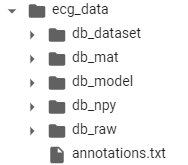

#[~ Global Section ]

In [0]:
#===========================================================================================================
# DEFINE SOURCE DIRECTORIES
#===========================================================================================================
# > _ base working directory
global_dir = '/content/drive/My Drive/Masters/workdir/ecg_data'
print('GLOBAL DIR :: '+global_dir)

# >> 0 global annotation and mapping, common for all ECG from https://physionet.org/about/database/
        # view this file on drive :: https://drive.google.com/open?id=1edhzatX7D3Uo03-d08Lksp807ULlcpgo
global_annot = os.path.join(global_dir, 'annotations.txt' ) 
print('GLOBAL ANNOTATIONS :: '+global_annot)

# >> 1 global mat data directory, source of ecg signal data in .mat format, use loadmat()
global_matdir = os.path.join(global_dir, 'db_mat')
print('GLOBAL MAT DIR :: '+global_matdir)

# >> 2 global npy directory, extract from mat to npy fromat and store here
global_npydir = os.path.join(global_dir, 'db_npy')
os.makedirs(global_npydir , exist_ok = True) 
print('GLOBAL NPY DIR :: '+global_npydir)

# >> 3 global model directory, contains model weights, use load_weights(), save_weights() 
global_modeldir = os.path.join(global_dir, 'db_model') 
os.makedirs(global_modeldir , exist_ok = True) 
print('GLOBAL MODEL DIR :: '+global_modeldir)

# >> 4 global dataset directory, contains manually generated datasets to be used for experiments
global_datadir = os.path.join(global_dir, 'db_dataset') 
os.makedirs(global_datadir , exist_ok = True) 
print('GLOBAL DATA DIR :: '+global_datadir)
#===========================================================================================================


#===========================================================================================================
#  Define annotation mapping dictionary (from global_annot)
#=========================================================================================================== 
g_map_data = np.loadtxt(global_annot, dtype='str',delimiter="\t")
g_map={}
print('ANNOTATION MAPPING :: ')
for a in g_map_data:
    g_map[a[0]]= int(a[1])
    print(str(a[0])+'\t'+str(a[1])+'\t'+str(a[2]))
    #a[0] = orignal mit label (char)
    #a[1] = mapped integer label (int)
    #a[2] = description (str)
g_map_keys = g_map.keys()
print('\nAnnotations : [' + str(len(g_map_keys))+'] :: ' + str(g_map_keys))
def mapstd(peak_label):
    res = np.zeros(len(peak_label),dtype='int')
    for i in range(0, len(peak_label)):
        res[i] = g_map[peak_label[i]]
    return res

g_LMAX = np.max(np.array(list(g_map.values()))) # this is max mapping value starting from 0
g_LMIN = -1 # this means unmapped (RR beat), 
#anything less than g_LMIN is unmapped(Non RR beat) and anythone greater is mapped(RR beat)
print('Integer Label Range [ '+str(g_LMIN)+ ' : '+str(g_LMAX)+' ]')
g_LABELS= ['N','S','V']             # labels to use when priniting confusion matrix
#===========================================================================================================

#------------------------------------------------------------------------------------------------
# Hear-Rate Params
#------------------------------------------------------------------------------------------------
H_min = 20          #bpm
max_rri = 60/H_min  #sec

H_low = 60          #bpm
hig_rri = 60/H_low  #sec

H_hig = 100         #bpm
low_rri = 60/H_hig  #sec

H_max = 240         #bpm
min_rri = 60/H_max  #sec

#------------------------------------------------------------------------------------------------
# Beat Formation PARAMS - use fixed dimesion for a beat (morphological)
#------------------------------------------------------------------------------------------------

# first downsample to a basic sampling rate then resample to fixed window which should be b/w 1 to 3 seconds
BASIC_SRATE = 128 #Hz
print('Basic sampling rate(Hz): '+str(BASIC_SRATE))
v_dim = int(BASIC_SRATE*(max_rri))  # INPUT VECTOR DIMENSION (BEAT VECTOR)
print('Re-sampled Vector Dim(#): '+str(v_dim))
limit_delta_rri = 0.04   
# for figure plots
plotdim_bfigsize = (v_dim/50 , 6)
plotdim_bylim = (-2.5, 3.5)
#---------------------------------------------------------------------------------------------------------------------------------------------
# Pre processing Functions
#---------------------------------------------------------------------------------------------------------------------------------------------

def denoise_signal(X, dwt_transform, dlevels, cutoff_low, cutoff_high):
    coeffs = wavedec(X, dwt_transform, level=dlevels)   # wavelet transform
    # scale 0 to cutoff_low 
    for ca in range(0,cutoff_low):
        coeffs[ca]=np.multiply(coeffs[ca],[0.0])
    # scale cutoff_high to end
    for ca in range(cutoff_high, len(coeffs)):
        coeffs[ca]=np.multiply(coeffs[ca],[0.0])
    Y = pywt.waverec(coeffs, dwt_transform) # inverse wavelet transform
    return Y  

def get_median_filter_width(sampling_rate, duration):
    res = int( sampling_rate*duration )
    res += ((res%2) - 1) # needs to be an odd number
    return res

def filter_signal(X,mfltrs_array):
    X0 = X  #read orignal signal
    for mi in range(0,len(mfltrs_array)):
        X0 = medfilt(X0,mfltrs_array[mi]) # apply median filter one by one on top of each other
    X0 = np.subtract(X,X0)  # finally subtract from orignal signal
    return X0

def get_minfo(minfo_path):
    f = open(minfo_path,'r')
    ls = f.readlines()
    f.close()
    #la = ls[minfo_line_index].split()    #I67m.mat 16+192 623/mV 16 0 4441 1894 0 II
    return ls # gain at 2 baseline at 4


#=========================================================================================================================
#======================= NEURAL NETWORK PERFORMANCE MEASURES
#=========================================================================================================================
# 3.3 :: define performance evaluation functions

def get_performance(conf_matrix):
    #how many classes? = len of conf_matril
    nos_class = len(conf_matrix[0,:]) # len of 0th row
    res = np.zeros((0,8),dtype ='float64')
    for i in range(0,nos_class):
        # for each class calculate 4 performance measure - ACC, PRE, SEN, SPF, 
        # first compute TP, TN, FP, FN
        TP = conf_matrix[i,i]
        FP = np.sum(conf_matrix[:,i]) - TP
        FN = np.sum(conf_matrix[i,:]) - TP
        TN = np.sum(conf_matrix) - FN - FP - TP

        ACC = (TP+TN)   /   (TP+FP+FN+TN)
        PRE = (TP)      /   (TP+FP)
        SEN = (TP)      /   (TP+FN)
        SPF = (TN)      /   (TN+FP)

        res_i = np.array([TP, FN, FP, TN, ACC, PRE, SEN, SPF])
        res = np.vstack((res,res_i))
    return res


#------------------------------------------------------------------PRINTING

def print_lstr(class_labels):
    g_LSTR=''   # HEADER ROW for printing confusing matrix
    for i in range(0,len(class_labels)):
        g_LSTR+='\t'+str(class_labels[i])
    return  g_LSTR

def print_cf_row(cf_row,nos_labels):
    res = ''
    for j in range(0,nos_labels):
        res += '\t'+ str(cf_row[j])
    return res
def print_conf_matrix(conf_matrix, suffix, class_labels):
    res=(suffix+'A\\P' + print_lstr(class_labels)+'\n')
    nos_l=len(class_labels)
    for i in range(0,nos_l):
        res+=(suffix+str(class_labels[i]) + print_cf_row(conf_matrix[i],nos_l )+'\n')
    return res
def print_performance(perf_measures, class_labels):
    nos_class = len(perf_measures[:,0])
    print('Performance for '+str(nos_class)+' classes')
    print ('Class\tACC\tPRE\tSEN\tSPF')
    for i in range(0, nos_class):
        perf_i = np.round(perf_measures [i,:],2)
        #print('\tT.P : '+str(perf_i[0])+'\tF.N : '+str(perf_i[1]))
        #print('\tF.P : '+str(perf_i[2])+'\tT.N : '+str(perf_i[3]))
        print(str(class_labels[i])+'\t'+str(perf_i[4])+'\t'+str(perf_i[5])+'\t'+str(perf_i[6])+'\t'+str(perf_i[7]))
    return
#------------------------------------------------------------------PRINTING

#-------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------


GLOBAL DIR :: /content/drive/My Drive/Masters/workdir/ecg_data
GLOBAL ANNOTATIONS :: /content/drive/My Drive/Masters/workdir/ecg_data/annotations.txt
GLOBAL MAT DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_mat
GLOBAL NPY DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_npy
GLOBAL MODEL DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_model
GLOBAL DATA DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_dataset
ANNOTATION MAPPING :: 
N	0	Normal beat
L	0	Left bundle branch block beat
R	0	Right bundle branch block beat
B	-1	Bundle branch block beat (unspecified)
A	1	Atrial premature beat
a	-1	Aberrated atrial premature beat
J	-1	Nodal (junctional) premature beat
S	1	Supraventricular premature or ectopic beat (atrial or nodal)
V	2	Premature ventricular contraction
r	-1	R-on-T premature ventricular contraction
F	-1	Fusion of ventricular and normal beat
e	-1	Atrial escape beat
j	-1	Nodal (junctional) escape beat
n	-1	Supraventricular escape beat (atri

#[~ Class definitions]

In [0]:
#------------------------------------------------------------------------------------------------
# signal data types

# beat and non-beat annotations
g_BEAT_POSTFIX, g_NBEAT_POSTFIX = 'BEAT', 'NBEAT'
g_BLF_II_POSTFIX = 'BLF_II'
g_RAW_II_POSTFIX = 'RAW_II'
g_RES_II_POSTFIX = 'RES_II'
g_SIG_II_POSTFIX = 'SIG_II'
#------------------------------------------------------------------------------------------------
class ecg_binfo:
    def __init__(self, rec):
        self.rec = rec
         # the record object
        self.sr_ratio = BASIC_SRATE/rec.srate
        rr_peaks_ants = rec.read_data(g_BEAT_POSTFIX)       # orignal ant file [ *  '625310' 'N' * ]
        # slice array
        rr_peaks_int = rr_peaks_ants[:,0].astype('int')     # col0 : samples * 62531 *  <---------------- not excluded
        rr_ants_str = rr_peaks_ants[:,1]                    # col1 : labels * 'N' *     <---------------- not excluded
        # excluded first and last
        self.rr_peaks = rr_peaks_int[1:-1]                       # col0 : samples (int) 62531 ==>==>==> sample# (orignal)
        self.rr_prev = rr_peaks_int[0:-2]                       # prev R peak (in samples)
        self.rr_next = rr_peaks_int[2:]                                           # next R peak (in samples)
        self.nos_rr_peaks = len(self.rr_peaks)              # no fo RR peaks (excluding first and last)
        self.rr_labels = rr_ants_str[1:-1]                       # col1 : labels (str)  'N'  ==>==>==> mit label (orignal)
        self.rr_int_labels = mapstd(self.rr_labels)                   # col1 : mapped int labels ==>==>==> int label (mapped -1, 0 ...) cant be -2 in 

        #temporal info
        self.rr_peaks_sec = self.rr_peaks / rec.srate              # col0 : time in sec (float) ==>==>==> sample (time in sec) sample#/srate
        self.rri_prev = (self.rr_peaks - self.rr_prev) / rec.srate   # prev RRI (in sec) 
        self.rri_next = (self.rr_next - self.rr_peaks) / rec.srate   # next RRI (in sec) 
        self.rri_delta = (self.rri_next - self.rri_prev)        # difference b/w prev and next RRI in seconds 
        self.rri_dur = (self.rri_next + self.rri_prev)
        #self.rri_avg = (self.dur) / (2)    # avg of prev and next RRI in seconds ==>==>==> length of the beat (prev R to next R peak)
        self.rr_signal = None

    def load_signal_data(self, data_type, manual_gain):
        sel_sig = self.rec.read_data(data_type) 
        
        self.rr_signal = [] 
        for i in range(0,self.nos_rr_peaks):
            ff, tt = int(self.rr_prev[i]*self.sr_ratio), int(self.rr_next[i]*self.sr_ratio)
            #print(str(ff) + ':' + str(tt))
            b_sig = sel_sig[ff:tt]/manual_gain                            # orignal clipped signal
            self.rr_signal.append(b_sig)
        return self.rr_signal


#---------------------------------------------------------------------------------------------------------------------------------------------
# CLASS ecg_record : represents one ECG Record in any database

# 6 Limb leads
std_I, std_II, std_III, std_AVL, std_AVR, std_AVF = 'I', 'II', 'III', 'AVL', 'AVR', 'AVF'

# 6 lateral leads
std_V1, std_V2, std_V3, std_V4, std_V5, std_V6, = 'V1', 'V2', 'V3', 'V4', 'V5', 'V6' 

# lead_mapper
g_LEAD_MAPPER = {}
# for incartdb
g_LEAD_MAPPER['I']=std_I
g_LEAD_MAPPER['II']=std_II
g_LEAD_MAPPER['III']=std_III
g_LEAD_MAPPER['AVL']=std_AVL
g_LEAD_MAPPER['AVR']=std_AVR
g_LEAD_MAPPER['AVF']=std_AVF
g_LEAD_MAPPER['V1']=std_V1
g_LEAD_MAPPER['V2']=std_V2
g_LEAD_MAPPER['V3']=std_V3
g_LEAD_MAPPER['V4']=std_V4
g_LEAD_MAPPER['V5']=std_V5
g_LEAD_MAPPER['V6']=std_V6
# for mitdb
g_LEAD_MAPPER['MLII']=std_II
#g_LEAD_MAPPER['V5']=std_V5  #<----duplicate
# for svdb
g_LEAD_MAPPER['ECG1']=std_II
g_LEAD_MAPPER['ECG2']=std_V5 #<------------- gotta be sure about this

class ecg_lead:
    def __init__(self, rec, lead_type, lead_index, lead_gain):
        self.rec = rec
        self.lead_type = lead_type
        self.lead_index = lead_index
        self.gain = lead_gain
        self.lead_signal = None

#---------------------------------------------------------------------------------------------------------------------------------------------
class ecg_record:

    def __init__(self, db, recname):
        self.db = db                                # class:{ecg_db}    object this record belongs to
        self.rec = recname                          # string            name of this record
        self.name = db.name + '_'+ recname          # string            full name including db.name

        if recname in db.recs_all:
            if recname in db.recs_exc:
                print('WARNING:: Record "'+ recname +'" is marked excluded from database '+ db.name )
        else:
            print('WARNING:: Record "'+ recname +'" not found in database '+ db.name )
            

        self.data = {}                              # dict dict of npy data file content used in self.read_data('key')
        self.binfo = None                           # class binfo       

        self.info = get_minfo(os.path.join(db.dir_mat,recname+'m.hea'))#,db.lead2_index+1)  # head has this info at lead2's index
        zero_line = self.info[0].split() # rec, noslead, srate, len_in_samples
        self.nos_leads = int( zero_line[1] ) #tottal number of leads available
        self.srate = int( zero_line[2] ) #sampling rate
        self.dlen = int( zero_line[3] ) # total sampling points, data length
        self.duration = self.dlen/self.srate # total duration in seconds
        
        self.lead_info = {}
        for i in range(1, self.nos_leads+1):
            tIA = self.info[i].split() 
            if tIA[8] in g_LEAD_MAPPER.keys():
                tIL = g_LEAD_MAPPER[tIA[8]]
                self.lead_info[tIL] = ecg_lead(self, tIL, int(i-1) ,int( tIA[2].split('/')[0]))
            else:
                print('WARNING:: UNMAPPED LEAD '+ str(tIA[8]))

    def load_mat_data(self, lead_type_list):
        mat_signal = loadmat(os.path.join( self.db.dir_mat , self.rec + 'm.mat'))['val']#[self_db.lead2_index]
        nj = 0
        for ldt in lead_type_list:
            if ldt in self.lead_info.keys():
                ilead = self.lead_info[ldt]
                ilead.lead_signal = mat_signal[ilead.lead_index]
        return 0

    def read_mat_data(self, lead_type):
        res = []
        if lead_type in self.lead_info.keys():
            ilead = self.lead_info[lead_type]
            res = ilead.lead_signal
        return res
            


    def read_binfo(self):
        if self.binfo == None:
            self.binfo = ecg_binfo(self)
        return self.binfo

    def read_data(self, data_type):
        if data_type in self.data.keys():
            return self.data[data_type] #= np.load(self.dirs[s])
        else:
            return self.load_data(data_type)

    def save_data(self, data_type, data_array, save_z):
        if save_z:
            ipath = os.path.join(self.db.dir_npy, self.rec + '_'+data_type+'.npy')
            np.save(ipath, data_array)
        else:
            ipath = os.path.join(self.db.dir_npy, self.rec + '_'+data_type+'.npz')
            numpy.savez(ipath, data_array)
        return ipath

    def del_data(self, data_type, vb):
        ipath = os.path.join(self.db.dir_npy, self.rec + '_'+data_type+'.npy')
        if os.path.exists(ipath):
            if vb:
                print('Removing: '+str(ipath))
            os.remove(ipath)
            return 1
        else:
            return 0
    
    def load_data(self, data_type):
        ipath = os.path.join(self.db.dir_npy, self.rec + '_'+data_type+'.npy')
        try: # try to load this data
            self.data[data_type] = np.load(ipath) # adds this to dictionary so next time it can read
            return self.data[data_type] #= np.load(self.dirs[s])
        except:
            print('WARNING:: Cant load "'+data_type+ '" file at '+ str(ipath) )
            return []

            
#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------
# CLASS ecg_db : represents one ECG database
#---------------------------------------------------------------------------------------------------------------------------------------------
class ecg_db:
    def __init__(self, dbname,  exclude_recs, tag_recs):
        print('\nInitailze new ecg database ... ')
        self.name = dbname  #str


        #self.dir_raw = global_dir + dbname+'_raw/' #str
        self.dir_mat = os.path.join(global_matdir , dbname+'_mat') #str
        self.dir_npy = os.path.join(global_npydir , dbname+'_npy') #str
        self.dir_ds = os.path.join(global_datadir , dbname+'_ds') #str
        self.recs_all = set(np.loadtxt(os.path.join(self.dir_mat,'RECORDS'), dtype='str',delimiter="\n")) #set
        self.recs_exc = set(exclude_recs)
        self.recs = set.difference(self.recs_all, self.recs_exc) 
        self.recs_tag = set(tag_recs)

        self.recs_dict = {} # initially empty, will be loaded on demand using function 'get_record'
        self.info()

    def info(self):
        print( 'DB NAME :: '+ self.name)
        print( 'MAT DIR :: ' + self.dir_mat )
        print( 'NPY DIR :: ' + self.dir_npy )
        print( 'RECORD SET :: [' +str(len(self.recs))+'] ' + str(self.recs) )
        return 0

    def get_record(self,rec):
        if not (rec in self.recs_dict.keys()):
            self.recs_dict[rec] = ecg_record(self,rec)
        return self.recs_dict[rec]
    
    def get_random_record(self, recset):
        rec = random.choice(list(recset))
        if not (rec in self.recs_dict.keys()):
            self.recs_dict[rec] = ecg_record(self,rec)
        return self.recs_dict[rec]

#---------------------------------------------------------------------------------------------------------------------------------------------



# [0~] Build Global dictionary

This contains all records from all databases. To read a record, Use
>  all_db['dbname'].get_record('recname')

In [0]:

all_db = {}
#------------------------------------------------------------------------
mitdb_ex = []
all_db['mitdb'] = ecg_db('mitdb',  mitdb_ex, [])
#------------------------------------------------------------------------
svdb_ex = [ ]
all_db['svdb'] = ecg_db('svdb',  svdb_ex, [])
#------------------------------------------------------------------------
incartdb_ex = []
all_db['incartdb'] = ecg_db('incartdb', incartdb_ex, [])
#------------------------------------------------------------------------
#print(all_db.values())
print('')
print(all_db.keys())



Initailze new ecg database ... 
DB NAME :: mitdb
MAT DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_mat/mitdb_mat
NPY DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_npy/mitdb_npy
RECORD SET :: [48] {'111', '123', '118', '116', '124', '200', '203', '101', '231', '104', '201', '115', '108', '119', '219', '122', '208', '106', '207', '117', '232', '105', '103', '221', '234', '112', '212', '215', '233', '223', '217', '100', '205', '214', '102', '230', '228', '210', '109', '113', '213', '209', '220', '202', '107', '121', '114', '222'}

Initailze new ecg database ... 
DB NAME :: svdb
MAT DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_mat/svdb_mat
NPY DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_npy/svdb_npy
RECORD SET :: [78] {'888', '862', '882', '847', '802', '852', '859', '891', '829', '848', '810', '864', '840', '883', '822', '880', '843', '807', '811', '804', '812', '820', '809', '893', '801', '884', '828', '844', '841', '860', '823', '8

## [view available leads]

In [0]:
for s in all_db.keys():
    sdb = all_db[s]
    for rec in sdb.recs_all:
        srec = sdb.get_record(rec)
        print(srec.name+'\t'+ str(srec.nos_leads)+'\t'+ str(srec.lead_info.keys()))
    

mitdb_201	2	dict_keys(['II', 'V1'])
mitdb_101	2	dict_keys(['II', 'V1'])
mitdb_113	2	dict_keys(['II', 'V1'])
mitdb_200	2	dict_keys(['II', 'V1'])
mitdb_232	2	dict_keys(['II', 'V1'])
mitdb_118	2	dict_keys(['II', 'V1'])
mitdb_217	2	dict_keys(['II', 'V1'])
mitdb_215	2	dict_keys(['II', 'V1'])
mitdb_234	2	dict_keys(['II', 'V1'])
mitdb_115	2	dict_keys(['II', 'V1'])
mitdb_112	2	dict_keys(['II', 'V1'])
mitdb_105	2	dict_keys(['II', 'V1'])
mitdb_205	2	dict_keys(['II', 'V1'])
mitdb_121	2	dict_keys(['II', 'V1'])
mitdb_228	2	dict_keys(['II', 'V1'])
mitdb_208	2	dict_keys(['II', 'V1'])
mitdb_220	2	dict_keys(['II', 'V1'])
mitdb_231	2	dict_keys(['II', 'V1'])
mitdb_233	2	dict_keys(['II', 'V1'])
mitdb_116	2	dict_keys(['II', 'V1'])
mitdb_207	2	dict_keys(['II', 'V1'])
mitdb_213	2	dict_keys(['II', 'V1'])
mitdb_209	2	dict_keys(['II', 'V1'])
mitdb_124	2	dict_keys(['II', 'V4'])
mitdb_107	2	dict_keys(['II', 'V1'])
mitdb_104	2	dict_keys(['V5', 'V2'])
mitdb_210	2	dict_keys(['II', 'V1'])
mitdb_212	2	dict_keys(['II',

## [view binfo]

In [0]:

for s in all_db.keys():
    sdb = all_db[s]
    fname = os.path.join(global_datadir, s+'_binfo.txt')
    f = open(fname,'w')
    for rec in sdb.recs_all:
        srec = sdb.get_record(rec)
        #print(srec.name+'\t'+ str(srec.nos_leads)+'\t'+ str(srec.lead_info.keys()))
        sinfo = srec.read_binfo()

        s_rec_name = str(sinfo.rec.name)
        s_sr_ratio = str(sinfo.sr_ratio)
        s_nospeak = str(sinfo.nos_rr_peaks)

        s_rr_peaks = sinfo.rr_peaks
        s_rr_pprev = sinfo.rr_prev
        s_rr_pnext = sinfo.rr_next
        s_rr_labels = sinfo.rr_labels
        s_rr_ilabels = sinfo.rr_int_labels
        s_rr_psec = sinfo.rr_peaks_sec
        s_rri_prev = sinfo.rri_prev
        s_rri_next = sinfo.rri_next
        s_rri_delta = sinfo.rri_delta
        s_rri_dur = sinfo.rri_dur
        print(s_rec_name+'\t'+s_nospeak)
        
        
        for j in range(0,sinfo.nos_rr_peaks):
            f.write(
                    #str(s_rr_pprev[j])+'\t'+
                    str(s_rec_name)+'\t'+
                    #str(s_rr_peaks[j])+'\t'+
                    str(round(s_rr_psec[j],6))+'\t'+
                    #tr(s_rr_pnext[j])+'\t'+
                    str(s_rr_labels[j])+'\t'+
                    #str(s_rr_ilabels[j])+'\t'+
                    str(round(s_rri_prev[j],6))+'\t'+
                    str(round(s_rri_next[j],6))+'\n'
                    #str(s_rri_delta[j])+'\t'+
                    #str(s_rri_dur[j])+'\n'
                    
                    
                    )

        #break
    f.close()

# [1**] Build numpy database (db_npy)

This part defines 4 database building functions and uses it to build the data in npy format
> def build_db_ants(self_db, output_postfix_beat, output_postfix_nonbeat, gmaps)

> def build_db_signal(self_db, output_postfix, lead_indices)

> def filter_db_signal(self_db, ms_flt_array, input_postfix, output_postfix)

> def denoise_db_signal(self_db, dwt_transform, dlevels, cutoff_low, cutoff_high, input_postfix, output_postfix):

### [1.1] Define db building functions

In [0]:

#---------------------------------------------------------------------------------------------------------------------------------------------
# Database Building Functions
#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------
# 1 Build Annotations :: a.txt -> ant.npy
def build_db_ants(self_db, gmaps, reclist):  
#---------------------------------------------------------------------------------------------------------------------------------------------
    #global g_map_keys
    #global g_map
    gmaps_keys = gmaps.keys()
    xs=len(reclist)
    #xc=1
    print('\nBEGIN TASK :: Build annotations for ' + str(xs)+ ' records')
    print('REC\tFound\tBEAT\tNONB' )
    for rec in reclist:
        #print('REC: '+rec+ '...'+str(xc)+ ' of '+ str(xs))
        #xc+=1
        ants = np.loadtxt(os.path.join(self_db.dir_mat , rec + 'a.txt'), dtype='str', delimiter= '\n', skiprows = 1)
        #print('\tFound Annotations\t'+str(len(ants)))
        antsbeat = np.zeros((0,2),dtype='str')
        antsnonbeat = np.zeros((0,2),dtype='str')
        #print('  annotations found '+str(len(ants)))
        for i in range(0,len(ants)):
            a_a = ants[i].split()
            a_sample = a_a[1]
            a_label = a_a[2]
            
            if a_label in gmaps_keys:
                bmaped = gmaps[a_label]
                if bmaped >= g_LMIN:
                    antsbeat = np.vstack((antsbeat,np.array([a_sample,a_label]))) # sample,label str
                else: # is non beat
                    antsnonbeat = np.vstack((antsnonbeat,np.array([a_sample,a_label]))) # sample,label str
            else:
                print('\tWARNING :: Unknown annotation "'+a_label+'" found at [' +a_sample+ '] in file a.txt, skipping....')
        
        #adf =  len(ants) - len(antsnpy) 
        #print('\tKnown Annotations\t'+str(len(antsnpy)))
        #print('\tUnknown Annotations\t'+str(adf))
        print(rec + '\t'+ str(len(ants)) + '\t'+str(len(antsbeat))+'\t' + str(len(antsnonbeat) ))
        # save for this record
        np.save(os.path.join(self_db.dir_npy , rec+ '_'+g_BEAT_POSTFIX+'.npy'), antsbeat)
        np.save(os.path.join(self_db.dir_npy , rec+ '_'+g_NBEAT_POSTFIX+'.npy'), antsnonbeat)
        #print('\tSaved at "'+save_loc+'"')
    print('\nEND TASK :: Build annotations for ' + str(xs)+ ' records')
    return 0
#---------------------------------------------------------------------------------------------------------------------------------------------


#---------------------------------------------------------------------------------------------------------------------------------------------
# 2 Extract Raw lead2 signal :: m.mat[lead2] -> raw2.npy
def build_db_signal(self_db, lead_dtype_list, reclist):  # saves xm.mat[lead2] --> x_raw2.npy
#---------------------------------------------------------------------------------------------------------------------------------------------
    xs=len(reclist)
    xc=0
    print('\nBEGIN TASK :: Save signal data for ' + str(xs)+ ' records')
    for rec in reclist:
        xc+=1
        print('Rec: '+rec+ ' ... '+ str(xc)+' of '+ str(xs))
        srec = self_db.get_record(rec)
        srec.load_mat_data(lead_dtype_list)
        for li in lead_dtype_list:        
            ldata = srec.read_mat_data(li)
            #print(type(ldata))
            if  len(ldata)!=0:
                np.save(os.path.join( self_db.dir_npy , rec + '_'+str(li)+'.npy'), ldata )    
            else:
                print('WARNING:: Lead data type '+ str(li)+ ' not found for record '+ str(srec.name))
    print('END TASK :: Save signal data for ' + str(xs)+ ' records')
    return 0
#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------
# 3a Filter Raw/Denoised signal :: raw2.npy -> med2.npy or den2.npy -> rmd2.npy
def filter_db_signal(self_db, ms_flt_array, input_postfix, output_postfix, reclist): 
#---------------------------------------------------------------------------------------------------------------------------------------------
    xs=len(reclist)
    xc=0
   
    #print('fun')
    
        #print('loop')
    print('\nBEGIN TASK :: filer signal data for ' + str(xs)+ ' records:' + input_postfix + ' --> ' + output_postfix)
    for rec in reclist:
        srec = self_db.get_record(rec)

        mfa = np.zeros(len(ms_flt_array), dtype='int')
        for i in range(0, len(ms_flt_array)):
            mfa[i] = get_median_filter_width(srec.srate,ms_flt_array[i])

        xc+=1
        print('Rec: '+rec+ ' ... '+ str(xc)+' of '+ str(xs))
        try:
            X = np.load(os.path.join( self_db.dir_npy , rec + '_'+input_postfix+'.npy')) #np.save(rec_fnpy + '_raw2.npy', mat_signal) 
            X_med2 = filter_signal(X, mfa)
            np.save(os.path.join( self_db.dir_npy , rec + '_'+output_postfix+'.npy'),X_med2) # save a copy of (median filtered ) signal = r,m  
        except:
            print('WARNING:: COUND NOT FILTER SIGNAL FOR '+ srec.name)
        #----------------------------------------------------------------------         
    print('END TASK :: filer signal data for ' + str(xs)+ ' records')
    return 0
#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------
# 3x Resample filtered data :: med2.npy --> res2.npy
def resample_db_signal(self_db, resample_rate, input_postfix, output_postfix, reclist): 
#---------------------------------------------------------------------------------------------------------------------------------------------
    xs=len(reclist)
    xc=0
   
    #print('fun')
      #resample_db_signal(db,BASIC_SRATE,g_BLF_II_POSTFIX, g_RES_II_POSTFIX, all_rec)
        #print('loop')
    print('\nBEGIN TASK :: resample signal data for ' + str(xs)+ ' records:' + input_postfix + ' --> ' + output_postfix+ ' @ '+ str(resample_rate) + ' Hz')
    for rec in reclist:
        srec = self_db.get_record(rec)
        sr_ratio = resample_rate/srec.srate
        xc+=1
        print('Rec: '+rec+ ' ... '+ str(xc)+' of '+ str(xs))
        try:
            X = np.load(os.path.join( self_db.dir_npy , rec + '_'+input_postfix+'.npy')) #np.save(rec_fnpy + '_raw2.npy', mat_signal) 
            #X_med2 = filter_signal(X, mfa)
            X_res2 = scsig.resample(X, round(len(X)*sr_ratio))
            np.save(os.path.join( self_db.dir_npy , rec + '_'+output_postfix+'.npy'),X_res2) # save a copy of (median filtered ) signal = r,m  
        except:
            print('WARNING:: COUND NOT RESAMPLE SIGNAL FOR '+ srec.name)
        #----------------------------------------------------------------------         
    print('END TASK :: resample signal data for ' + str(xs)+ ' records')
    return 0
#---------------------------------------------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------------------------------------------
# 3b Denoise Raw/Filtered signal :: med2.npy -> rdm2.npy or raw2.npy -> den2.npy
def denoise_db_signal(self_db, dwt_transform, dlevels, cutoff_low, cutoff_high, input_postfix, output_postfix,reclist):
#---------------------------------------------------------------------------------------------------------------------------------------------
    xs=len(reclist)
    xc=0
    
    print('\nBEGIN TASK :: denoising signal data for ' + str(xs)+ ' records:' + input_postfix + ' --> ' + output_postfix)
    for rec in reclist:
        xc+=1
        print('Rec: '+rec+ ' ... '+ str(xc)+' of '+ str(xs))
        X = np.load(os.path.join( self_db.dir_npy , rec + '_'+input_postfix+'.npy') ) # np.load(self_db.dir_npy + rec + '_raw2.npy')
        X_rlt2 = denoise_signal(X,dwt_transform, dlevels, cutoff_low, cutoff_high )
        np.save(os.path.join( self_db.dir_npy , rec + '_'+output_postfix+'.npy'),X_rlt2) # save a copy of (only denoised)  signal = r,m,d 
        #----------------------------------------------------------------------         
    print('END TASK :: denoising signal data for ' + str(xs)+ ' records')
    return 0
#---------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------


### [1.2*] Build db_npy

In [0]:
#    C A R E F U L   D O N T     R U N    T H I S 
#---------------------------------------------
# PARAMS
#---------------------------------------------
approach = 1  # select Filtering approach
timestamp_start = datetime.datetime.now()
print(timestamp_start)
print('S T A R T \n')

#_____________________________________________


db_data = all_db.values()
for db in db_data:
    all_rec = db.recs_all
#=========================================================================================
    print ('\n START ON DATABASE: '+ db.name +' \t'+ str(datetime.datetime.now()))
    directory = os.makedirs(os.path.join(global_npydir, db.name+'_npy') , exist_ok = True) 
#=========================================================================================

#=========================================================================================
# STEP 0 : (REQUIRED : Annotation data)
#=========================================================================================
    print ('\n COPY ANNOTATIONS \t'+ str(datetime.datetime.now()))
    # def build_db_ants(self_db, output_postfix):
    build_db_ants(db, g_map, all_rec)  


#=========================================================================================
# STEP 1 : (REQUIRED : Signal Data)
#=========================================================================================
    print ('\n EXTRACT RAW SIGNAL \t'+ str(datetime.datetime.now()))
    # def build_db_signal(self_db, output_postfix, lead_indices):  # saves xm.mat[lead2] --> x_raw2.npy
    # use build_db_signal(db, [g_RAW?_POSTFIX],[db.lead?_index]) 
    build_db_signal(db, [std_II], all_rec)

    
#=========================================================================================
# STEP 2 : (Preprocessing)
#=========================================================================================
    print ('\n FILTER :: \t'+ str(datetime.datetime.now()))
    # def filter_db_signal(self_db, ms_flt_array, input_postfix, output_postfix): 
    filter_db_signal(db, [0.2,0.6], std_II, g_BLF_II_POSTFIX,all_rec) 
    #filter_db_signal(db, [0.2,0.6], g_RAW5_POSTFIX, g_MED5_POSTFIX,all_rec) 

    print ('\n RESAMPLE :: \t'+ str(datetime.datetime.now()))
    resample_db_signal(db,BASIC_SRATE,g_BLF_II_POSTFIX, g_RES_II_POSTFIX, all_rec)
    #(self_db, resample_rate, input_postfix, output_postfix, reclist): 
    #if approach==0:
        # STEP 2.a : First 'median Filter' the signal then 'denoise' it
        #=========================================================================================
        #print ('\n DENOISE :: MED -> FLT \t'+ str(datetime.datetime.now()))
        # def denoise_db_signal(self_db, dwt_transform, dlevels, cutoff_low, cutoff_high, input_postfix, output_postfix):
        #denoise_db_signal(db, 'bior4.4', 11 , 2 , 9, g_MED2_POSTFIX, g_FLT2_POSTFIX,all_rec )
        #denoise_db_signal(db, 'bior4.4', 11 , 2 , 9, g_MED5_POSTFIX, g_FLT5_POSTFIX,all_rec )
        
    #else:
        # STEP 2.b : First 'denoise' the signal then 'median filter' it
        #=========================================================================================
        #print ('\n DENOISE :: RAW -> DEN \t'+ str(datetime.datetime.now()))
        # def denoise_db_signal(self_db, dwt_transform, dlevels, cutoff_low, cutoff_high, input_postfix, output_postfix):
        #denoise_db_signal(db, 'bior4.4', 11 , 2 , 9, g_RAW2_POSTFIX, g_DEN2_POSTFIX ,all_rec)
        #denoise_db_signal(db, 'bior4.4', 11 , 2 , 9, g_RAW5_POSTFIX, g_DEN5_POSTFIX ,all_rec)
        #print ('\n FILTER :: DEN -> FLT \t'+ str(datetime.datetime.now()))
        # def filter_db_signal(self_db, ms_flt_array, input_postfix, output_postfix):  
        #filter_db_signal(db, [0.2,0.6], g_DEN2_POSTFIX, g_FLT2_POSTFIX,all_rec) 
        #filter_db_signal(db, [0.2,0.6], g_DEN5_POSTFIX, g_FLT5_POSTFIX,all_rec) 
        
    
#=========================================================================================
    print ('\n END ON DATABASE:'+ db.name +' \t'+ str(datetime.datetime.now()))
#=========================================================================================
print('\n E N D ')
timestamp_dur = datetime.datetime.now() - timestamp_start
print(timestamp_dur)
#    C A R E F U L   D O N T     R U N    T H I S 




2020-04-09 19:19:32.351095
S T A R T 


 START ON DATABASE: mitdb 	2020-04-09 19:19:32.351975

 RESAMPLE :: 	2020-04-09 19:19:32.486327

BEGIN TASK :: resample signal data for 48 records:BLF_II --> RES_II @ 128 Hz
Rec: 102 ... 1 of 48
Rec: 234 ... 2 of 48
Rec: 113 ... 3 of 48
Rec: 200 ... 4 of 48
Rec: 107 ... 5 of 48
Rec: 212 ... 6 of 48
Rec: 108 ... 7 of 48
Rec: 114 ... 8 of 48
Rec: 112 ... 9 of 48
Rec: 121 ... 10 of 48
Rec: 124 ... 11 of 48
Rec: 213 ... 12 of 48
Rec: 232 ... 13 of 48
Rec: 101 ... 14 of 48
Rec: 106 ... 15 of 48
Rec: 217 ... 16 of 48
Rec: 105 ... 17 of 48
Rec: 220 ... 18 of 48
Rec: 223 ... 19 of 48
Rec: 209 ... 20 of 48
Rec: 117 ... 21 of 48
Rec: 208 ... 22 of 48
Rec: 210 ... 23 of 48
Rec: 219 ... 24 of 48
Rec: 231 ... 25 of 48
Rec: 205 ... 26 of 48
Rec: 221 ... 27 of 48
Rec: 100 ... 28 of 48
Rec: 222 ... 29 of 48
Rec: 104 ... 30 of 48
Rec: 207 ... 31 of 48
Rec: 230 ... 32 of 48
Rec: 228 ... 33 of 48
Rec: 109 ... 34 of 48
Rec: 115 ... 35 of 48
Rec: 123 ... 36 of 48
Rec

### [1.3] Delete data_types

In [0]:
#    remove a data type
#---------------------------------------------
# PARAMS
#---------------------------------------------

#del_dtypes = ['beat','nbeat', 'II', 'BLF_II', 'RES_II']
del_dtypes = ['SIG_II']
#del_dtypes.extend([ 'sig_flt2','sig_flt5', 'mean_flt2', 'medi_flt2', 'mean_flt5', 'medi_flt5'])
#del_dtypes.extend([ 'medi_med2', 'medi_med5'])
#del_dtypes.extend([ 'medi_all_med2', 'medi_all_med5'])
#del_dtypes.extend([ 'mean_med2',  'mean_med5'])
#del_dtypes.extend([ 'mean_all_med2',  'mean_all_med5'])
#del_dtypes.extend([ 'sig_med2', 'sig_med5'])
#del_dtypes.extend([ 'den2','den5','flt2','flt5'])
timestamp_start = datetime.datetime.now()
print(timestamp_start)
print('S T A R T \n')

#_____________________________________________

tfd = 0
db_data = all_db.values()
for db in db_data:
    all_rec = db.recs_all
#=========================================================================================
    print ('\n START ON DATABASE: '+ db.name +' \t'+ str(datetime.datetime.now()))
#=========================================================================================
    for recs in all_rec:
        rec = db.get_record(recs)
        for ddt in del_dtypes:
            tfd+=(rec.del_data(ddt, True))
#=========================================================================================
    print ('\n END ON DATABASE:'+ db.name +' \t'+ str(datetime.datetime.now()))
#=========================================================================================
print('\n Total files deleted = '+str(tfd))
timestamp_dur = datetime.datetime.now() - timestamp_start
print(timestamp_dur)

#    C A R E F U L   D O N T     R U N    T H I S 




# TEST saved data

In [0]:
for k in all_db.values():
    k.recs_tag=set([])

idb_str = 'incartdb'
sel_db = all_db[idb_str]
print(sel_db.recs)

#-----------------------------------
irec_str = 'I14'
sel_db.recs_tag = set([irec_str])
sel_rec = sel_db.get_record(irec_str)
print(sel_rec.name)

sbinf = sel_rec.read_binfo()
sgain=sel_rec.lead_info['II'].gain
print(sgain)

#-----------------------------------
#def load_signal_data(self, data_type, manual_gain):

j = sbinf.load_signal_data(g_RES_II_POSTFIX, sel_rec.lead_info[g_RAW_II_POSTFIX].gain)
#j = sbinf.rr_signal

#-----------------------------------
for jx in range(0,3):
    ix = random.randint(0, len(j)-1)
    print(str(ix)+'\t'+ str(len(j[ix])))
    #plt.figure(ix)
    
    plt.plot(j[ix])

#-----------------------------------
print(len(j))
for i in range(0, len(j)):
    print(j[i].shape)

# N__MODEL

In [0]:

def get_episodes(AA, m):
    eps = []
    ii = 0
    li = -1
    lena = len(AA)
    #while (True):
    for ii in range(0,lena):
        if ii==lena-1:
            delta = 2
        else:
            delta = AA[ii+1] - AA[ii]

        if delta>1:
            if li>=0:
                # check length before appending
                if AA[ii] + 1 - li  >= m:
                    eps.append([li, AA[ii] + 1 ]) # excluding upper limit
                li = -1
        else:
            if delta==1:
                if li<0:
                    li=AA[ii]
                
    # end loop--------  
    return eps

#-------------------------------------------------------
def gen_MMV(signal_array):
    #rr_binfo.rr_signal
    vdim = signal_array.shape[1]
    vcount = signal_array.shape[0]
    mean_beatX = np.zeros(vdim, dtype='float')
    median_beatX = np.zeros(vdim, dtype='float')
    var_beatX = np.zeros(vdim, dtype='float')
    if vcount < 2:
        for i in range(0,vdim):
            mean_beatX[i] = signal_array[0,i]
            median_beatX[i] = signal_array[0,i]
            var_beatX[i] = signal_array[0,i] 
    else:
        for i in range(0,vdim):
            mean_beatX[i] = stats.mean(signal_array[:,i])
            median_beatX[i] = stats.median(signal_array[:,i])
            var_beatX[i] = stats.variance(signal_array[:,i] )
    return mean_beatX, median_beatX, var_beatX

# 3.2 :: define network models
cost = 'sparse_categorical_crossentropy'
opt = 'rmsprop'
# otherwise Create a loss function
def closs(y_true,y_pred):
    return kbend.mean(kbend.abs(y_pred - y_true),axis=-1)

# call back
cb_esr = tf.keras.callbacks.EarlyStopping(
        monitor='acc', 
        min_delta=0.00001, 
        patience=2, 
        verbose=0, 
        mode='auto', 
        baseline=None, 
        restore_best_weights=False)
cb_listr=[cb_esr] 


def get_modelCNN(print_summary, input_shape_compared,input_shape_tempo ):
    itempo = Input( shape=input_shape_tempo, name = "input_tempo" )

# COMPAR INPUT SIDE ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    icompar = Input( shape=input_shape_compared, name = "input_compar" )

    conv_icompar_1 =  Conv1D(30,                #filters, 
                          int(v_dim/25.6),                  #kernel_size, 
                          strides=1, 
                          padding='valid', 
                          data_format='channels_last', 
                          dilation_rate=1, 
                          activation=tf.nn.leaky_relu, 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None, 
                          bias_regularizer=None, 
                          activity_regularizer=None, 
                          kernel_constraint=None, 
                          bias_constraint=None) (icompar) 
    
    #maxpool_icompar_2 = MaxPooling1D(pool_size=2, 
    #                              strides=None, 
    #                              padding='valid', 
    #                              data_format='channels_last') (conv_icompar_1)
    
    conv_icompar_3 =  Conv1D(20,                #filters, 
                          3,                  #kernel_size, 
                          strides=1, 
                          padding='valid', 
                          data_format='channels_last', 
                          dilation_rate=1, 
                          activation=tf.nn.leaky_relu, 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None, 
                          bias_regularizer=None, 
                          activity_regularizer=None, 
                          kernel_constraint=None, 
                          bias_constraint=None)(conv_icompar_1) #(maxpool_icompar_2)
    
    #maxpool_icompar_4 = MaxPooling1D(pool_size=2, 
    #                              strides=None, 
    #                              padding='valid', 
    #                              data_format='channels_last') (conv_icompar_3)
    conv_icompar_5 =  Conv1D(10,                #filters, 
                          3,                  #kernel_size, 
                          strides=1, 
                          padding='valid', 
                          data_format='channels_last', 
                          dilation_rate=1, 
                          activation=tf.nn.leaky_relu, 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None, 
                          bias_regularizer=None, 
                          activity_regularizer=None, 
                          kernel_constraint=None, 
                          bias_constraint=None) (conv_icompar_3)#(maxpool_icompar_4)
    
    #maxpool_icompar_6 = MaxPooling1D(pool_size=2, 
    #                              strides=None, 
    #                              padding='valid', 
    #                              data_format='channels_last') (conv_icompar_5)
    
    flat_icompar_7 = Flatten(data_format=None) (conv_icompar_5) #(maxpool_icompar_6)
    den_icompar_8 = Dense(20, activation=tf.nn.leaky_relu, name = "dense_compar") (flat_icompar_7)

# CONCAT LAYER SIDE ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    den_concat =  tf.concat([den_icompar_8, itempo],axis=1, name = "dense_concat") # should have 40 nodes

# DENSE SIDE ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    den_fc0 = Dense(20, activation=tf.nn.relu, name = "DENSE_FC0")(den_concat)
    
    den_fc1 = Dense(10, activation=tf.nn.relu, name = "DENSE_FC1")(den_fc0)

# OUTPUT SIDE ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    den_out = Dense(len(g_LABELS), activation=tf.nn.softmax, name = "OUTPUT_FC")(den_fc1)

# =========================================================================================
    model=Model(inputs=[icompar,itempo], outputs=den_out)
    #-------------------------------------
    #model.get_layer(name="LSTM_50").trainable=is_trainable
    #-------------------------------------
    model.compile(loss=cost, optimizer=opt, metrics=['accuracy'])
    if print_summary:
        print(model.summary())
    return model
#==============================================================================

def get_modelRNN(print_summary, input_shape_compared, input_shape_tempo ):
    itempo = Input( shape=input_shape_tempo, name = "input_tempo" )

# COMPAR INPUT SIDE ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    icompar = Input( shape=input_shape_compared, name = "input_compar" ) #shape=input_shape_compared,

    icompar_1 =  LSTM                   (150,
                                        activation='tanh', 
                                        recurrent_activation='sigmoid', 
                                        use_bias=True, 
                                        kernel_initializer='glorot_uniform', 
                                        recurrent_initializer='orthogonal', 
                                        bias_initializer='zeros', unit_forget_bias=True, 
                                        kernel_regularizer=None, 
                                        recurrent_regularizer=None, 
                                        bias_regularizer=None, 
                                        activity_regularizer=None, 
                                        kernel_constraint=None, 
                                        recurrent_constraint=None, 
                                        bias_constraint=None, 
                                        dropout=0.0, 
                                        recurrent_dropout=0.0, 
                                        implementation=2, 
                                        return_sequences=True, 
                                        return_state=False, 
                                        go_backwards=False,
                                        stateful=False, 
                                        unroll=False)(icompar) 
    
    icompar_2 = LSTM                    (50,
                                        activation='tanh', 
                                        recurrent_activation='sigmoid', 
                                        use_bias=True, 
                                        kernel_initializer='glorot_uniform', 
                                        recurrent_initializer='orthogonal', 
                                        bias_initializer='zeros', unit_forget_bias=True, 
                                        kernel_regularizer=None, 
                                        recurrent_regularizer=None, 
                                        bias_regularizer=None, 
                                        activity_regularizer=None, 
                                        kernel_constraint=None, 
                                        recurrent_constraint=None, 
                                        bias_constraint=None, 
                                        dropout=0.0, 
                                        recurrent_dropout=0.0, 
                                        implementation=2, 
                                        return_sequences=False, 
                                        return_state=False, 
                                        go_backwards=False,
                                        stateful=False, 
                                        unroll=False)(icompar_1) 
    
    #flat_icompar_7 = Flatten(data_format=None) (conv_icompar_2) #(maxpool_icompar_6)
    icompar_3 = Dense(20, activation=tf.nn.leaky_relu, name = "dense_compar") (icompar_2)

# CONCAT LAYER SIDE ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    den_concat =  tf.concat([icompar_3, itempo],axis=1, name = "dense_concat") # should have 20+2 nodes

# DENSE SIDE ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    den_fc0 = Dense(10, activation=tf.nn.leaky_relu, name = "DENSE_FC0")(den_concat)

# OUTPUT SIDE ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    den_out = Dense(len(g_LABELS), activation=tf.nn.softmax, name = "OUTPUT_FC")(den_fc0)

# =========================================================================================
    model=Model(inputs=[icompar,itempo], outputs=den_out)
    #-------------------------------------
    #model.get_layer(name="LSTM_50").trainable=is_trainable
    #-------------------------------------
    model.compile(loss=cost, optimizer=opt, metrics=['accuracy'])
    if print_summary:
        print(model.summary())
    return model

# [ DATASET BUILDING PROCEDURE ]

In [0]:
CONST_TEMP_DATA = 1


# =================================================================================================================
def get_data_from_query(query_list, binfo, reps_postfix, do_shuffle):
    t_data_rep = binfo.rec.read_data(reps_postfix)
    if len(t_data_rep)==0:
        print('WARNING:: Representative beat len is 0.... skip this record: '+ str(binfo.rec.name))
        return
    tdata = [] #np.zeros((0,v_dim+2), dtype='float') # +2 cause we append peak location and label
    for t_where in query_list:
        #print('\tFor: '+str(binfo.rec.name)+':'+str(binfo.nos_rr_peaks)+': len rrsig = '+ str(binfo.rr_signal.shape))
        #print('\tquery: '+ str(t_where.shape)+':'+ str(t_where[0:2]))
        tdata_compar = binfo.rr_signal[t_where] 
        #print(tdata_compar.shape)
        if len(tdata_compar)==0:
            print('WARNING:: Compar data not found .... skip this record: '+ str(binfo.rec.name))
            tdata.append([])
            continue
        for i in range(0, len(tdata_compar)):
            tdata_compar[i]-=t_data_rep
        #print('rep final \t'+str(t_data_rep.shape))
        tdata_peak = np.expand_dims(binfo.rr_peaks[t_where],axis=1)
        tdata_label = np.expand_dims(binfo.rr_int_labels[t_where],axis=1)
        
        tdata_pRRI = np.expand_dims(binfo.rri_prev[t_where],axis=1)
        tdata_nRRI = np.expand_dims(binfo.rri_next[t_where],axis=1)
        #print('f final ' + '\t'+str(tdata_peak.shape)+ '\t'+str(tdata_label.shape)+ '\t'+str(t_data_rep.shape)+ '\t'+str(tdata_compar.shape))
        #print('satarts....')
        tdata_all = np.hstack( (tdata_peak, tdata_label, tdata_pRRI,tdata_nRRI ) )

        #print('hm....'+ str(tdata_all.shape)+';;;;'+ str(tdata_compar.shape))
        if tdata_compar.ndim == 1:
            tdata_compar=np.expand_dims(tdata_compar,axis=1)
        tdata_all = np.concatenate((tdata_all,tdata_compar), axis=1)
        #print('....ya')
        for i in range(0,do_shuffle):
            np.random.shuffle(tdata_all)

        tdata.append(tdata_all)
    return tdata
#===========================================================================================
def get_shaped_data(data_G):
    #Dlabel, Dtemp, Dsig 
    Dlabel = []
    Dtemp = []
    Dsig = []
    for i in data_G:
        Dlabel.append(data_G[i][0])
        Dtemp.append(data_G[i][1:3])
        Dsig.append(data_G[i][3:])
    #Dm = Dm.reshape( dlen, vdim,1)  #np.expand_dims(Dm, axis=-1)
    return Dlabel, Dtemp, Dsig 


# TRAINING

## DB_DICT for Training

In [0]:

train_db = {}
#------------------------------------------------------------------------
mitdb_ex = [
            '102', '104', '107', '217',     # contains paced beats
            '212', '231',                   # contains both Normal and BBB type beats
            '207',  '223',                        # contains both RBBB and LBBB type beats
            '108'                          # bad record data on lead2
            #'228' ,                          # not enough normal episodes of min len 10
            # '232','221',                     # not enough normals
            #'107','123','201', '203', '219',  '101','200','210',                     # no rep beat
            ]
ecg_db_mitdb = ecg_db('mitdb', mitdb_ex, [])
#ecg_db_mitdb.recs_tag = ecg_db_mitdb.recs #set.difference(ecg_db_mitdb.recs_all , ecg_db_mitdb.recs_exc)
#ecg_db_mitdb.recs_tag = set.difference(ecg_db_mitdb.recs_all , ecg_db_mitdb.recs_exc)
ecg_db_mitdb.recs_tag = set(['220'])

#------------------------------------------------------------------------
svdb_ex = [
           '852',                            # missing lead2 signal
           '860', '822', '858','854','892',
          ]
#ecg_db_svdb = ecg_db('svdb', svdb_ex, [])
#ecg_db_svdb.recs_tag = ecg_db_svdb.recs #set.difference(ecg_db_svdb.recs_all , ecg_db_svdb.svdb_exc)

#------------------------------------------------------------------------
incartdb_ex = [
               'I03',                        # bad rep beats
               'I43','I53','I19', 'I51', 'I42','I59','I41','I75'  # not enough normals
                ]
#ecg_db_incartdb = ecg_db('incartdb', incartdb_ex, [])
#ecg_db_incartdb.recs_tag = ecg_db_incartdb.recs #set.difference(ecg_db_incartdb.recs_all , ecg_dbincartdb.svdb_exc)
#------------------------------------------------------------------------

train_db[ecg_db_mitdb.name] = ecg_db_mitdb
#train_db[ecg_db_svdb.name] = ecg_db_svdb
#train_db[ecg_db_incartdb.name] = ecg_db_incartdb
print('')
print(train_db.keys())


Initailze new ecg database ... 
DB NAME :: mitdb
MAT DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_mat/mitdb_mat
NPY DIR :: /content/drive/My Drive/Masters/workdir/ecg_data/db_npy/mitdb_npy
RECORD SET :: [39] {'215', '111', '200', '234', '109', '115', '117', '219', '233', '202', '112', '106', '123', '230', '220', '228', '209', '118', '113', '208', '100', '121', '116', '205', '222', '124', '232', '214', '213', '103', '105', '114', '122', '203', '210', '101', '119', '221', '201'}

dict_keys(['mitdb'])


## PREPARE TRAINING DATA

In [0]:
s_db = train_db

dur_start = 0
dur_end = 30*60
b_query_labels = []
b_query_tempo = []
b_query_sig = []
for tdb in s_db.keys():
    idb = s_db[tdb]
    for irec in idb.recs_tag:
        sel_rec = idb.get_record(irec)
        rr_binfo = sel_rec.read_binfo()
        rr_sig = rr_binfo.load_signal_data(g_RES_II_POSTFIX,  sel_rec.lead_info[g_RAW_II_POSTFIX].gain)

        
        for i in range(0,len(g_LABELS)):
            bi_query = ((rr_binfo.rr_int_labels==i) &
                        #(np.abs(rr_binfo.rri_delta)<=limit_delta_rri) &
                        (rr_binfo.rr_peaks_sec>=dur_start) & (rr_binfo.rr_peaks_sec<dur_end))
            bi_where = np.where(bi_query)[0] # <<=====  use all ith beats
            print(g_LABELS[i]+'\t'+ str(len(bi_where)))
            # label | prri | nrri | signal data
            for ii in range(0, len(bi_where)):

                b_query_labels.append(rr_binfo.rr_int_labels[bi_where[ii]])
                b_query_tempo.append(
                    np.hstack((
                        rr_binfo.rri_prev[bi_where[ii]], 
                        rr_binfo.rri_next[bi_where[ii]], 
                    ))

                )
                b_query_sig.append(rr_sig[bi_where[ii]])
            

        


N	1946
S	94
V	0


In [0]:
print(len(b_query_labels))
print(len(b_query_tempo))
print(len(b_query_sig))


2040
2040
2040


In [0]:
#ji = b_query[random.randint(0, len(b_query)-1)]
ji = -1
jlabel = b_query_labels[ji]
jrri = b_query_tempo[ji]
jsig = b_query_sig[ji]

1
[0.55555556 1.02222222]


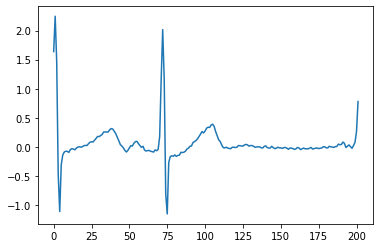

In [0]:
print(jlabel)
print(jrri)
plt.plot(jsig)

## PREFORM TRAINING

In [0]:
#print('Available Datasets::')
#ds = os.listdir(global_datadir)
#for lf in ds:
#    print(lf)
print('\nAvailable Models::')
ds = os.listdir(global_modeldir)
for lf in ds:
    print(lf)


Available Models::


In [0]:
# CHOOSE PARAMS
ds_name = b_query                      # dataset to train upon (load this)
ds_model = 'e1_model_RNN_med2'                          # save model as, mt for morph+temp
include_tempo_data = True
ff=0

#==============================================================
timestamp_start = datetime.datetime.now()
print(timestamp_start)
print('Start Training\n')
#for i in range(0,len(ds_nameL)):
    #==============================================================

print('\n ...working '+ str(ds_name)+' ...\n')
#>>>>>>>>>>>>>>>>>>> SPLIT LOOP HERE

#all_train = np.load( os.path.join(global_datadir, ds_name + '.npy' )) 
Dlabel, Dtemp, Dsig = b_query_labels, b_query_tempo, b_query_sig

# in morphology-only model, avoid inputting temporal data, make it constant.
if not include_tempo_data:
    Dtemp = Dtemp*0 + CONST_TEMP_DATA
#-------------------------------------------------------------------------------------------------------
data_x = [Dsig, Dtemp]
data_y = Dlabel

print('Loaded beats: ' + str(len(data_y)))
#-------------------------------------------------------------------------------------------------------

v_dim = 500
#model = get_modelCNN(True, (v_dim,1),  (2))
model = get_modelRNN(True, (v_dim,1) (2))
history = model.fit(
                    data_x, data_y,
                    #batch_size=1000,
                    epochs=300,
                    callbacks=cb_listr,
                    #validation_data=([alle_m.reshape((elen,timesteps,1)),alle_t],alle_l),
                    shuffle=True,
                    verbose=1)

plt.figure(ff)
ff+=1
plt.title('ACC: '+ds_name)
plt.plot(history.history['acc'],color='green')
plt.show()

plt.figure(ff)
ff+=1
plt.title('LOSS: '+ds_name)
plt.plot(history.history['loss'],color='red')
plt.show()

#save this model
save_model_name = ds_model +'.h5'        # save model weights to this file
svmpth = os.path.join(global_modeldir, save_model_name)
model.save_weights(svmpth)
#print('Saved Model : '+save_model_name )
print('saved model at '+ str(svmpth))
#-------------------------------------------------------------------------------------------------------
# 
print('End Procedure\n')
timestamp_dur = datetime.datetime.now() - timestamp_start
print(timestamp_dur)
#print('TOTAL REP BEATS in database = '+ str(len(mega_rep)))

2020-04-10 21:36:57.554323
Start Training



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



TypeError: ignored

In [0]:
model.get_layer(1).

# TESTING

## DB DICT for Testing

In [0]:

test_db = {}

#------------------------------------------------------------------------
mitdb_ex = [
            '102', '104', '107', '217',     # contains paced beats
            '212', '231',                   # contains both Normal and BBB type beats
            '207',                          # contains both RBBB and LBBB type beats
            #'108',                          # bad record data on lead2
            #'228' ,                          # not enough normal episodes of min len 10
            # '232','221',                     # not enough normals
            #'107','123','201', '203', '219',  '101','200','210',                     # no rep beat
            ]
#ecg_db_mitdb = ecg_db('mitdb', mitdb_ex, [])
#ecg_db_mitdb.recs_tag = ecg_db_mitdb.recs #set.difference(ecg_db_mitdb.recs_all , ecg_db_mitdb.recs_exc)

#------------------------------------------------------------------------
svdb_ex = [
           '852',                            # missing lead2 signal
           #'860', '822', '858','854','892',
          ]
#ecg_db_svdb = ecg_db('svdb', svdb_ex, [])
#ecg_db_svdb.recs_tag = ecg_db_svdb.recs #set.difference(ecg_db_svdb.recs_all , ecg_db_svdb.svdb_exc)

#------------------------------------------------------------------------
incartdb_ex = [
               'I03',                        # bad rep beats
               'I43','I53','I19', 'I51', 'I42','I59','I41','I75'  # not enough normals
                ]
ecg_db_incartdb = ecg_db('incartdb', incartdb_ex, [])
ecg_db_incartdb.recs_tag = ecg_db_incartdb.recs #set.difference(ecg_db_incartdb.recs_all , ecg_dbincartdb.svdb_exc)
#------------------------------------------------------------------------

#test_db[ecg_db_mitdb.name] = ecg_db_mitdb
#test_db[ecg_db_svdb.name] = ecg_db_svdb
test_db[ecg_db_incartdb.name] = ecg_db_incartdb
print('')
print(test_db.keys())

## PREPARE TESTING DATA

In [0]:
# CHOOSE PARAMS------------------------------------
# dtype_load_postfixL, g_MEDIAN_POSTFIXL, g_MEAN_POSTFIXL = [ 'mean_med2',  'mean_med5']
dtype_load_postfixL = [g_BLF_II_POSTFIX+'_SIG'] #dtype_save_postfixL = [g_BLF_II_POSTFIX+'_SIG'] #dtype_load_postfixL = [ 'sig_med2', 'sig_med5']
g_MEDIAN_ALL_POSTFIXL = [g_BLF_II_POSTFIX+'_MEDI']
g_MEAN_ALL_POSTFIXL = [g_BLF_II_POSTFIX+'_MEAN']
ds_nameL = ['e1_test_med2']           # to save testing data as  

dur_start = 0*60                # sec from
dur_end = 30*60                 #a sec, to
min_beats= 20         
use_nac_for_testing = False    # if True, uses only NAC episodes to extract N beats for testing

#==============================================================


timestamp_start = datetime.datetime.now()
print(timestamp_start)
print('Start Experiment\n')
print('NAC Only \t'+ str(use_nac_for_testing))
print('Limit selection time(sec): '+ str(dur_start)+','+  str(dur_end))
print('min selection #beats: '+ str(min_beats))
#==============================================================
for i in range(0,len(ds_nameL)):
    print('\n ...working'+str(ds_nameL[i])+' ...\n')
    saved_at = prepare_data(test_db,
        ds_nameL[i], 
        dtype_load_postfixL[i],
        dur_start, 
        dur_end, 
        True,
        0, 
        0, 
        True,
        min_beats,
        g_MEDIAN_ALL_POSTFIXL[i],
        use_nac_for_testing,
        0,0)
    print(saved_at)
print('End Procedure\n')
timestamp_dur = datetime.datetime.now() - timestamp_start
print(timestamp_dur)
#print('TOTAL REP BEATS in database = '+ str(len(mega_rep)))

## PERFORM TESTING

In [0]:
print('Available Datasets::')
ds = os.listdir(global_datadir)
for lf in ds:
    print(lf)
print('\nAvailable Models::')
ds = os.listdir(global_modeldir)
for lf in ds:
    print(lf)

In [0]:
# Choose Params----------------------------------
# dtype_load_postfixL, g_MEDIAN_POSTFIXL, g_MEAN_POSTFIXL = [ 'mean_med2',  'mean_med5']
ds_nameL = ['e1_train_med2']           # to load test set    
ds_modelL = ['e1_model_TEMP_med2']        # to load model weights
#-------------------------------------------------------------------------------------------------------
include_tempo_data = True
for ii in range(0, len(ds_nameL)):
    ds_name = ds_nameL[ii]
    print('\n... working '+str(ds_name)+ '...\n')
#==============================================================================
    all_test = np.load( os.path.join(global_datadir, ds_name + '.npy' )) 
    Dm, Dy, Dp, Dr = get_shaped_data(all_test,v_dim)
    if not include_tempo_data:
        Dr = Dr*0 + CONST_TEMP_DATA
    #-------------------------------------------------------------------------------------------------------
    data_x = [Dm, Dr]
    data_y = Dy
    print('Loaded beats: ' + str(data_y.shape))
    #-------------------------------------------------------------------------------------------------------
    #-------------------------------------------------------------------------------
    #get the model - skip this to use the on same model as on training
    model = get_model(False, (v_dim,1), (2))
    load_model_name = ds_modelL[ii] + '.h5'     # model used for testing
    model.load_weights(os.path.join(global_modeldir, load_model_name))
    #-------------------------------------------------------------------------------------------------------
    #model.evaluate( x=data_x, y=data_y )
    #-------------------------------------------------------------------------------------------------------
    # manual prediction
    print('Manual Prediction on REC: ' + ds_name)

    #evla = model.evaluate( data_x, data_y ) data_med med_rep
    #print(evla)
    #print ('Predict on dataset '+ sel_ds + ' using model ' + global_model_name) 
    predx = model.predict( data_x ) # array of  samples x classes(4) - each row is a prediction of sample
    cmx_global = np.zeros((len(g_LABELS),len(g_LABELS)),dtype='int32')
    cmx2_global = predx.argmax(axis=1)
    for i in range(0,len(cmx2_global)):
        alabel = int(data_y[i])
        plabel = cmx2_global[i]
        cmx_global[alabel,plabel]+=1
    print('\tConfusion Matrix')
    print(print_conf_matrix( cmx_global,'', g_LABELS)) #logit('\t'+str(cmx))
    print_performance( get_performance(cmx_global) ,g_LABELS ) 
    #-------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------
# 
#-------------------------------------------------------------------------------------------------------



In [0]:

... working e1_test_med2...

Loaded beats: (124825,)
Manual Prediction on REC: e1_test_med2
	Confusion Matrix
A\P	N	S	V	F
N	98462	7300	2704	559
S	150	1393	393	0
V	934	1465	11109	158
F	50	14	97	37

Performance for 4 classes
Class	ACC	PRE	SEN	SPF
N	0.91	0.99	0.9	0.93
S	0.93	0.14	0.72	0.93
V	0.95	0.78	0.81	0.97
F	0.99	0.05	0.19	0.99

## View Results

In [0]:
#vi = 14 # random.randint(0, len(Dp)-1)
via_FP = np.where((cmx2_global==0) & (Dy!=0))[0] # predcited normal but not normal
via_FN = np.where( (cmx2_global!=0) & (Dy==0))[0] # predicted abnormal but
via_TP = np.where( (cmx2_global==0) & (Dy==0))[0]
via_TN = np.where( (cmx2_global!=0) & (Dy!=0))[0]
cmm = np.array([[len(via_TP),len(via_FN)],[len(via_FP),len(via_TN)]])

print('\tConfusion Matrix')
print(print_conf_matrix( cmm,'', ['N','A'])) #logit('\t'+str(cmx))
print_performance( get_performance(cmm) ,['N','A'] )

In [0]:
via = via_TP
vlen = len(via)
vi = random.randint(0, vlen-1)
print(vlen)

In [0]:


vi = via[vii]
print(str(vii)+' # '+ str(vi))



plt.plot(Dm[vi], color='black', label = 'rep', linewidth=0.6)
plt.ylim(plotdim_bylim)
#plt.plot(Dx[vi], label = 'beat')
plt.title('Actual = ' + str(Dy[vi])+ ' | Pred = '+str(cmx2_global[vi])+ ' conf='+str(predx[vi]))
#plt.plot(Dp[vi])

#view_beat(0, sel_rec, Dp[vi], g_MED2_POSTFIX )
vii+=1
if vii>=vlen:
    vii=0

# RECORD TESTING

g_BEAT_POSTFIX, g_NBEAT_POSTFIX = 'BEAT', 'NBEAT'
g_BLF_II_POSTFIX = 'BLF_II'
g_RAW_II_POSTFIX = 'II'
g_RES_II_POSTFIX = 'RES_II'

In [0]:
for k in all_db.values():
    k.recs_tag=set([])

idb_str = 'incartdb'
sel_db = all_db[idb_str]
print(sel_db.recs)

{'I60', 'I58', 'I14', 'I21', 'I27', 'I73', 'I45', 'I12', 'I15', 'I18', 'I22', 'I39', 'I23', 'I75', 'I46', 'I05', 'I13', 'I25', 'I42', 'I31', 'I10', 'I04', 'I62', 'I29', 'I63', 'I19', 'I67', 'I08', 'I65', 'I66', 'I48', 'I34', 'I61', 'I72', 'I28', 'I68', 'I20', 'I24', 'I26', 'I33', 'I38', 'I02', 'I47', 'I49', 'I52', 'I35', 'I17', 'I50', 'I41', 'I37', 'I71', 'I16', 'I64', 'I57', 'I06', 'I36', 'I30', 'I07', 'I40', 'I54', 'I74', 'I55', 'I53', 'I03', 'I51', 'I32', 'I69', 'I70', 'I43', 'I56', 'I44', 'I01', 'I59', 'I11', 'I09'}


In [0]:

irec_str = 'I20'
sel_db.recs_tag = set([irec_str])
sel_rec = sel_db.get_record(irec_str)
print(sel_rec.name)

incartdb_I20


In [0]:
# CHOOSE PARAMS------------------------------------
# dtype_load_postfixL, g_MEDIAN_POSTFIXL, g_MEAN_POSTFIXL = [ 'mean_med2',  'mean_med5']
# ds_nameL = ['e4_test_med2', 'e4_test_med5']           # to save testing data as  
# dtype_load_postfixL = [ 'sig_med2', 'sig_med5']

dur_start = 0*60                # sec from
dur_end = 30*60                 #a sec, to
min_beats = 20        

use_nac_for_testing = False    # if True, uses only NAC episodes to extract N beats for testing
do_shuf = 0
#==============================================================

g_MEDIAN_POSTFIX = g_BLF_II_POSTFIX+'_MEDI'
g_MEAN_POSTFIX = g_BLF_II_POSTFIX+'_MEAN'
dtype_load_postfix =g_BLF_II_POSTFIX+'_SIG'
# CHOOSE PARAMS -----------------------------------------------------------------------------
ds_name = sel_rec.name + dtype_load_postfix

#==============================================================
timestamp_start = datetime.datetime.now()
print(timestamp_start)
#print('Start Experiment\n')
print('NAC Only \t'+ str(use_nac_for_testing))

print('Limit selection time(sec): '+ str(dur_start)+','+  str(dur_end))
print('minselection #beats: '+ str(min_beats))
#==============================================================
saved_at = prepare_data(all_db,
        ds_name, 
        dtype_load_postfix,
        dur_start, 
        dur_end, 
        True,
        0, 
        0,
        True, 
        min_beats,
        g_MEDIAN_POSTFIX,
        use_nac_for_testing,
        6,2)
print(saved_at)




print('End Procedure\n')
timestamp_dur = datetime.datetime.now() - timestamp_start
print(timestamp_dur)
#print('TOTAL REP BEATS in database = '+ str(len(mega_rep)))

# Perform test

In [0]:
print('Available Datasets::')
ds = os.listdir(global_datadir)
for lf in ds:
    print(lf)
print('\nAvailable Models::')
ds = os.listdir(global_modeldir)
for lf in ds:
    print(lf)

In [0]:
#-------------------------------------------------------------------------------------------------------
ds_name = 'incartdb_I20BLF_II_SIG'
ds_model = 'e1_model_TEMP_med2'
#-------------------------------------------------------------------------------------------------------
include_tempo_data=True
print('\n... working '+str(ds_name)+ '...\n')
#==============================================================================
all_test = np.load( os.path.join(global_datadir, ds_name + '.npy' )) 
Dm,  Dy, Dp, Dr = get_shaped_data(all_test,v_dim)
if not include_tempo_data:
    Dr = Dr*0 + CONST_TEMP_DATA
#-------------------------------------------------------------------------------------------------------
data_x = [Dm,  Dr]
data_y = Dy
print('Loaded beats: ' + str(data_y.shape))
#-------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
#get the model - skip this to use the on same model as on training
model = get_model(False, (v_dim,1),(2))
load_model_name = ds_model + '.h5'     # model used for testing
model.load_weights(os.path.join(global_modeldir, load_model_name))
#-------------------------------------------------------------------------------------------------------
#model.evaluate( x=data_x, y=data_y )
#-------------------------------------------------------------------------------------------------------
# manual prediction
print('Manual Prediction on REC: ' + ds_name)

#evla = model.evaluate( data_x, data_y ) data_med med_rep
#print(evla)
#print ('Predict on dataset '+ sel_ds + ' using model ' + global_model_name) 
predx = model.predict( data_x ) # array of  samples x classes(4) - each row is a prediction of sample
cmx_global = np.zeros((len(g_LABELS),len(g_LABELS)),dtype='int32')
cmx2_global = predx.argmax(axis=1)
for i in range(0,len(cmx2_global)):
    alabel = int(data_y[i])
    plabel = cmx2_global[i]
    cmx_global[alabel,plabel]+=1
print('\tConfusion Matrix')
print(print_conf_matrix( cmx_global,'', g_LABELS)) #logit('\t'+str(cmx))
print_performance( get_performance(cmx_global) ,g_LABELS ) 



# View results


In [0]:
#vi = 14 # random.randint(0, len(Dp)-1)
via_FP = np.where((cmx2_global==0) & (Dy!=0))[0] # predcited normal but not normal
via_FN = np.where( (cmx2_global!=0) & (Dy==0))[0] # predicted abnormal but
via_TP = np.where( (cmx2_global==0) & (Dy==0))[0]
via_TN = np.where( (cmx2_global!=0) & (Dy!=0))[0]
cmm = np.array([[len(via_TP),len(via_FN)],[len(via_FP),len(via_TN)]])

print('\tConfusion Matrix')
print(print_conf_matrix( cmm,'', ['N','A'])) #logit('\t'+str(cmx))
print_performance( get_performance(cmm) ,['N','A'] )

# plot data and predictions

In [0]:
start_at = 0*60
window_wid = 5*60
end_at = 30*60-window_wid

In [0]:
# view actual record data along predictions
print(sel_rec.name)
figs = 0
while(start_at <= end_at):
    ff = start_at
    tt = ff + window_wid

    dur = tt-ff
    srate = sel_rec.srate
    mgain = sel_rec.lead_info[std_II].gain
    ffs, tts = ff*srate, tt*srate
    dsd = sel_rec.read_data( g_BLF_II_POSTFIX)[ffs:tts] * (1/mgain)

    ants_a = sel_rec.read_data(g_BEAT_POSTFIX)
    ants_i = ants_a[:,0].astype('int')
    ants = ants_a[(ants_i>=ffs)&(ants_i<tts)]

    # figure
    plt.figure(figs,figsize=((dur),6))
    figs+=1
    plt.title(sel_rec.name + '[' + str(ff)+':'+str(tt)+']')
    plt.ylim(-2.5,3.5)
    plt.xlim(0,len(dsd)+srate*2 )
    plt.grid(axis='x')

    # signal
    plt.plot(dsd,color='black',linewidth=0.7)

    # MIT annotaions (as ticks)
    tikx = ants[:,0].astype(int) - ffs
    tiky = ants[:,1]
    plt.xticks( tikx, tiky )

    # predictions
    # str(Dy[vi])+ ' | Pred = '+str(cmx2_global[vi])+ ' conf='+str(predx[vi]))
    qqq = ((Dp>=ffs)&(Dp<tts))
    Dpp = Dp[qqq] - ffs
    Dyy = Dy[qqq] 
    Dcm = cmx2_global[qqq]

    plt.scatter( Dpp[Dyy==0], (Dyy[Dyy==0] * 0) - 2 , color='green', marker='o',label='true N'  )
    plt.scatter( Dpp[Dyy>0], (Dyy[Dyy>0] * 0) - 2 , color='red', marker='o',label='true A'  )


    plt.scatter( Dpp[Dcm==0], (Dcm[Dcm==0] * 0) -1.75  , color='green', marker='s',label='pred N'  )
    plt.scatter( Dpp[Dcm>0], (Dcm[Dcm>0] * 0) - 1.75 , color='red', marker='s' ,label='pred A' )

    pq1 = ((Dcm!=0) & (Dyy==0))
    plt.scatter( Dpp[pq1], Dyy[pq1]*0 -1 , color='tab:blue', marker='s' ,label='False A' )

    pq1 = ((Dcm==0) & (Dyy!=0))
    plt.scatter( Dpp[pq1], Dyy[pq1]*0 -1 , color='tab:orange', marker='s' ,label='False N' )
    plt.legend()
    plt.show()
    #{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
    #'tab:purple', 'tab:brown', 'tab:pink', 
    #'tab:gray', 'tab:olive', 'tab:cyan'} 
    start_at += window_wid


# View Records

In [0]:
for k in all_db.values():
    k.recs_tag=set([])

idb_str = 'mitdb'
sel_db = all_db[idb_str]
print(sel_db.recs)


{'102', '234', '113', '200', '107', '212', '108', '114', '112', '121', '124', '213', '232', '101', '106', '217', '105', '220', '223', '209', '117', '208', '210', '219', '231', '205', '221', '100', '222', '104', '207', '230', '228', '109', '115', '123', '233', '201', '103', '214', '215', '202', '203', '122', '118', '116', '111', '119'}


In [0]:
irec_str = '232'
sel_db.recs_tag = set([irec_str])
sel_rec = sel_db.get_record(irec_str)
print(sel_rec.name)

sbinf = sel_rec.read_binfo()

mitdb_232


mitdb_232


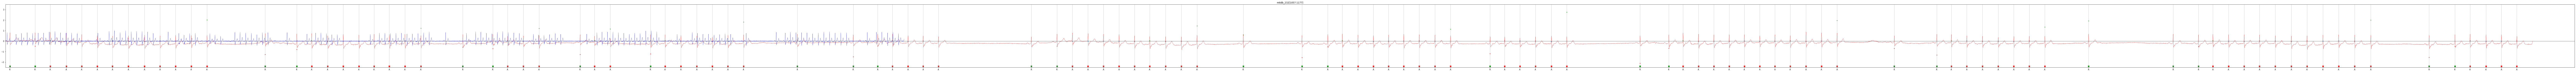

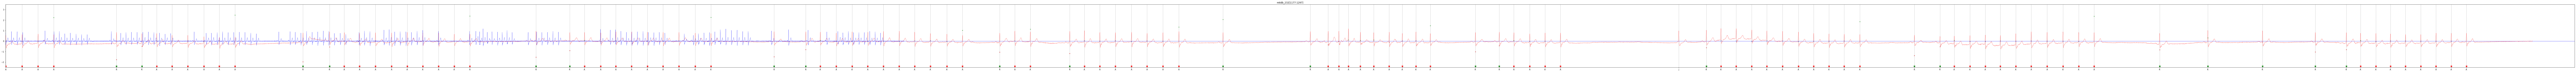

In [0]:
start_at = 1057
window_wid = 120
end_at = 1057+120
ytt = np.arange(-1,1.1, 0.1)
# view actual record data along predictions
print(sel_rec.name)

figs = 0
while(start_at <= end_at):
    ff = start_at
    tt = ff + window_wid

    dur = tt-ff
    srate = sel_rec.srate
    mgain = sel_rec.lead_info[std_II].gain
    ffs, tts = ff*srate, tt*srate
    ffsres, ttsres = ff*BASIC_SRATE,tt*BASIC_SRATE
    #dsd = sel_rec.read_data( g_BLF_II_POSTFIX)[ffs:tts] * (1/mgain)
    dsdraw = sel_rec.read_data( g_RAW_II_POSTFIX)[ffs:tts] * (1/mgain)
    dsdres = sel_rec.read_data( g_RES_II_POSTFIX)[ffsres:ttsres] * (1/mgain)
    ants_a = sel_rec.read_data(g_BEAT_POSTFIX)
    ants_i = ants_a[:,0].astype('int')
    ants = ants_a[(ants_i>=ffs)&(ants_i<tts)]

    # figure
    plt.figure(figs,figsize=((dur*2),6))
    figs+=1
    plt.title(sel_rec.name + '[' + str(ff)+':'+str(tt)+']')
    plt.ylim(-2.5,3.5)
    plt.xlim(0,len(dsd)+srate*2 )
    plt.grid(axis='x')

    # signal
    #plt.plot(dsd,color='black',linewidth=0.5)
    plt.plot(dsdraw,color='red',linewidth=0.5)
    plt.plot(dsdres,color='blue',linewidth=0.5)
    # MIT annotaions (as ticks)
    tikx = ants[:,0].astype(int) - ffs
    tiky = ants[:,1]

    
    plt.xticks( tikx, tiky )
    
    
    #plt.yticks(ytt,[] )

    # delta rri
    sc_x = sbinf.rr_peaks[(sbinf.rr_peaks>=ffs)&(sbinf.rr_peaks<tts)] - ffs
    sc_y = sbinf.rri_delta[(sbinf.rr_peaks>=ffs)&(sbinf.rr_peaks<tts)] 
    tsc = sbinf.rr_int_labels[(sbinf.rr_peaks>=ffs)&(sbinf.rr_peaks<tts)]

    plt.scatter(sc_x[sc_y>=limit_delta_rri],sc_y[sc_y>=limit_delta_rri], marker='.', color='tab:green')
    plt.scatter(sc_x[(sc_y<limit_delta_rri)&(sc_y>-limit_delta_rri)],sc_y[(sc_y<limit_delta_rri)&(sc_y>-limit_delta_rri)], marker='.', color='tab:blue')
    plt.scatter(sc_x[sc_y<=-limit_delta_rri],sc_y[sc_y<=-limit_delta_rri], marker='.', color='tab:red')

    plt.scatter(sc_x[tsc==0],tsc[tsc==0]*0-2.4, marker = 's', color='green')
    plt.scatter(sc_x[tsc>0],tsc[tsc>0]*0-2.4, marker = 's', color='red')

    #plt.hlines(ytt,0, len(dsd)+srate*2, linewidth=0.5, color='black', linestyle = 'dotted'  )
    #plt.hlines(limit_delta_rri, 0,len(dsd)+srate*2, linewidth=0.8, color='tab:red' )
    plt.hlines(0, 0, len(dsd)+srate*2, linewidth=0.8, color='blue' )
    #plt.hlines(-limit_delta_rri, 0,len(dsd)+srate*2, linewidth=0.8, color='tab:red' )
    # predictions
    # str(Dy[vi])+ ' | Pred = '+str(cmx2_global[vi])+ ' conf='+str(predx[vi]))
   


    #plt.legend()
    plt.show()
    #{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
    #'tab:purple', 'tab:brown', 'tab:pink', 
    #'tab:gray', 'tab:olive', 'tab:cyan'} 
    start_at += window_wid


# New Section